# Distribuciones Discretas

Muchos eventos y fenómenos del mundo natural pueden medirse utilizando escalas y supuestos similares. Esto permite especificar la distribución correspondiente como una ecuación que resume el comportamiento de la función sin tener que especificar el peso de probabilidad de cada entrada por separado.

En este apunte presentamos algunas de estas distribuciones.

### Distribución Bernoulli

_Modela el resultado en un evento binario._

$$\begin{align}
\mathrm{\textbf{Variable Aleatoria}}\\
X\in\{0,1\}\\
&\mathrm{Variable \textbf{ discreta } que\ representa\newline 
    las\ dos\ posibilidades\ en\ un\newline 
    evento\ binario.}\\\\
\mathrm{\textbf{Parámetros}}\\
\theta\in(0,1)\\
&\mathrm{Probabilidad\ del\ caso\ \textit{éxito}.}\\\\
\mathrm{\textbf{Función de Masa}}\\ 
\mathrm{\textbf{de Probabilidad (PMF)}}\\
&P(X)=\theta^{x}(1-\theta)^{1-x}\\\\
&P(X)=\begin{cases}
        P(X=0)&=\theta^0(1-\theta)^{1-0}\\
              &=(1-\theta)\\\\
        P(X=1)&=\theta^1(1-\theta)^{1-1}\\
              &=\theta\\
    \end{cases}\\
\mathrm{\textbf{Notación Compacta}}\\
X\sim Bernoulli(\theta)\\
&\textrm{Esta expresión es una forma compacta}\\
&\textrm{de resumir el dominio de la variable,}\\
&\textrm{los parámetros de la distribución,}\\
&\textrm{y su función de masa específica.}
\end{align}$$

Por ejemplo, si utilizamos la distribución Bernoulli para modelar un volado con una moneda justa:

$$\begin{align}
X&\sim Bernoulli(\theta=0.5)\\\\
P(X)&=\begin{cases}
        P(X=0)&=(1-\theta)\\
              &=0.5\\\\
        P(X=1)&=\theta^1(1-\theta)^0\\
              &=0.5\\
    \end{cases}
\end{align}$$

O para modelar el evento "obtener 4 con un dado justo":

$$\begin{align}
X&\sim Bernoulli\left(\theta=\frac{1}{6}\right)\\\\
P(X)&=\begin{cases}
        P(X=0)&=(1-\theta)\\
              &=\frac{5}{6}\\\\
        P(X=1)&=\theta^1(1-\theta)^0\\
              &=\frac{1}{6}\\
    \end{cases}
\end{align}$$

En otras palabras, esta distribución es la manera _formal_ de decir que, en un evento binario, si se conoce la probabilidad de éxito en automático se conoce la probabilidad de fracaso. Esta idea está expresada en la ecuación específica de la función de masa de probabilidad, que, de la misma manera que en el resto de las distribuciones siguientes, especifica **los valores de probabilidad como función de los _valores numéricos_** de la variable.



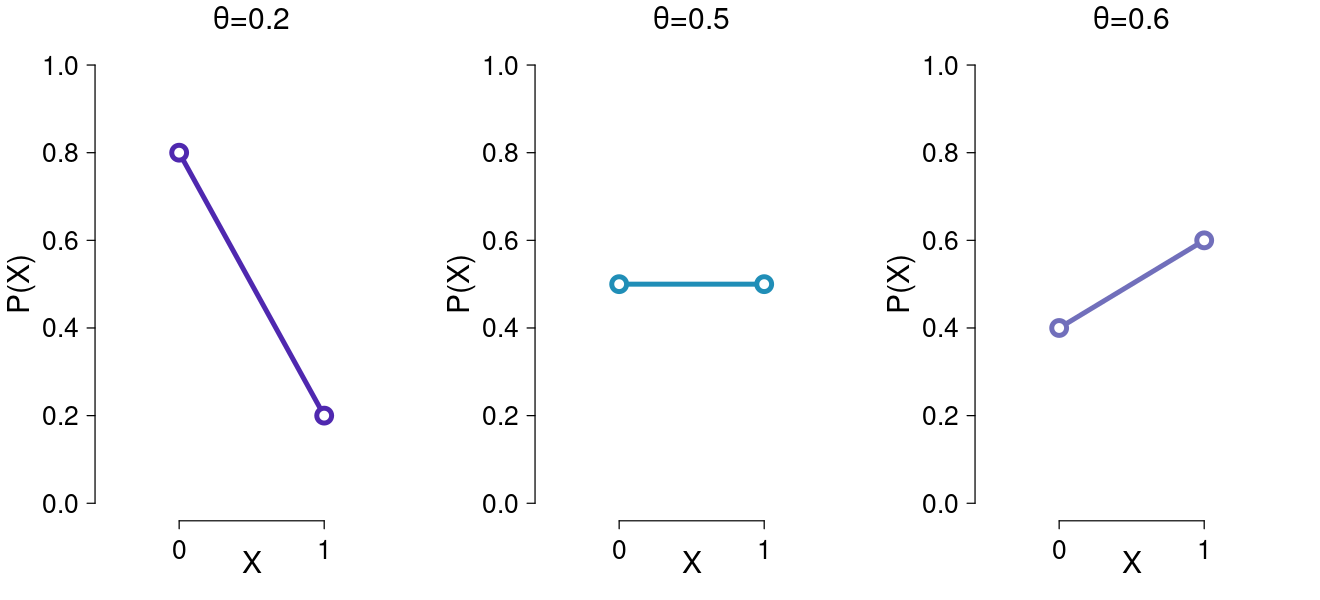

In [11]:
# Examples Bernoulli Distribution
# Density Definition
bernoulli <- function(prob){
    x <- c(0,1)
    pmf <- prob^x*(1-prob)^(1-x)
    return(list(x=x,pmf=pmf))
}
# Plotting
options(repr.plot.width = 11, repr.plot.height = 5)
par(mar=c(5,6,3,2),cex.axis=2)
layout(matrix(1:3,ncol=3))
# 3 coin flips
theta <- c(0.2,0.5,0.6)
colors <- c('#4f28af','#208eb7','#716fbb')
for(th in 1:length(theta)){
    plot(NULL,xlim=c(-0.5,1.5),ylim=c(0,1),ann=F,axes=F)
    axis(1,at=0:1,padj=.5);axis(2,las=1)
    distribution <- bernoulli(theta[th])
    points(distribution$x,distribution$pmf,
          pch=21,bg='#ffffff',type='o',lwd=4,cex=2.5,col=colors[th])
    mtext('X',1,line=2.5,cex=1.5)
    mtext('P(X)',2,line=4,cex=1.5)
    mtext(paste('\u03b8=',theta[th],sep=''),3,line=1,cex=1.5)
}


#### Extendiendo la Distribución Bernoulli (Pt. 1)

Aparte de utilizar la Bernoulli para modelar un solo evento binario, podemos extenderla para modelar el resultado de varios. Imaginen que vamos a tirar **dos volados** con una moneda justa y nos interesa especificar la incertidumbre sobre el **número de éxitos** que obtendremos. En este caso, la variable aleatoria $K$ tiene tres posibilidades:

$$K\in\{0,1,2\}$$

Para calcular qué tan probable es cada uno de ellos conviene imaginar las posibilidades **conjuntas** entre el primer $X_1$ y segundo $X_2$ volados, e identificar el valor de $K$ correspondiente a cada entrada de esa conjunta:

|$\mathbf{K}$|$X_{1}=0$|$X_{1}=1$|
|:-:|:-:|:-:|
|$X_{2}=0$|$\mathbf{0}$|$\mathbf{1}$|
|$X_{2}=1$|$\mathbf{1}$|$\mathbf{2}$|

En otras palabras, para encontrar la distribución sobre $K$ basta con encontrar la conjunta entre $X_1$ y $X_2$. Sabemos que podemos expresar dicha conjunta como:

$$P(X_1,X_2)=P(X_2|X_1)P(X_1)$$

Modelaremos $X_1$ como una variable Bernoulli común y corriente, llamando $\gamma$ a la probabilidad de éxito en esa variable:

$$X_1\sim Bernoulli(\gamma),$$

es decir:

$$P(X_1)=\begin{cases}
P(X_1=0)=(1-\gamma)\\
P(X_1=1)=\gamma
\end{cases}$$

A continuación necesitamos la condicional $P(X_2|X_1)$. Para especificarla conviene recordar qué representa: esta distribución es la incertidumbre sobre el resultado en el segundo volado después de observar el primero. _¿Qué esperarían sobre el segundo volado si **a.** en el primero observan SOL, o si **b.** observan ÁGUILA, o si **c.** no tienen información sobre lo que pasó en el primer volado? ¿Hay razones para modificar la incertidumbre en alguno de esos escenarios?_ En otras palabras, como las expectativas sobre $X_2$ son (argüiblemente) las mismas en los tres escenarios, podemos suponer que $X_1$ y $X_2$ son **independientes**:

$$X_1\bot X_2,$$

lo cual quiere decir:

$$P(X_2|X_1)=P(X_2),$$

que permite calcular la conjunta entre los dos volados como:

$$\begin{align}P(X_1,X_2)&=P(X_2|X_1)P(X_1)\\
    &=P(X_2)P(X_1)
\end{align}$$

Finalmente, para especificar la marginal sobre $X_2$, que es otra variable Bernoulli, vamos a suponer que la probabilidad de éxito en el segundo volado es **idéntica** a la probabilidad de éxito en el primero (que referimos como $\gamma$):

$$X_2\sim Bernoulli(\gamma)$$

En otras palabras, _suponiendo_ **independencia** _y_ **distribución idéntica** entre los dos ensayos Bernoulli, la distribución conjunta entre ellos es igual a:

$$P(X_1,X_2)=\begin{cases}
    P(X_1=0,X_2=0)=(1-\gamma)(1-\gamma)\\
    P(X_1=0,X_2=1)=(1-\gamma)\gamma\\
    P(X_1=1,X_2=0)=\gamma(1-\gamma)\\
    P(X_1=1,X_2=1)=\gamma\gamma\\
\end{cases}$$

Noten que cada una de estas combinaciones tiene un valor de $K$ asociado (la variable que cuenta cantidad de éxitos). Presentando esta relación de forma explícita, junto con algunos exponentes implícitos en la expresión anterior:

$$P(X_1,X_2)=\begin{cases}
    P(X_1=0,X_2=0)=\gamma^{\mathbf{0}}(1-\gamma)^{\mathbf{2}}:K=\mathbf{0}\\
    P(X_1=0,X_2=1)=\gamma^{\mathbf{1}}(1-\gamma)^{\mathbf{1}}:K=\mathbf{1}\\
    P(X_1=1,X_2=0)=\gamma^{\mathbf{1}}(1-\gamma)^{\mathbf{1}}:K=\mathbf{1}\\
    P(X_1=1,X_2=1)=\gamma^{\mathbf{2}}(1-\gamma)^{\mathbf{0}}:K=\mathbf{2}\\
\end{cases}$$

Incluir los exponentes de manera explícita permite comenzar a descubrir la relación entre ellos y los posibles valores de $K$. Además, podemos presentar dicha relación todavía más clara añadiendo $n=2$, que es el número de volados bajo estudio:

$$P(X_1,X_2)=\begin{cases}
    P(X_1=0,X_2=0)=\gamma^{\mathbf{0}}(1-\gamma)^{2-\mathbf{0}}:K=\mathbf{0}\\
    P(X_1=0,X_2=1)=\gamma^{\mathbf{1}}(1-\gamma)^{2-\mathbf{1}}:K=\mathbf{1}\\
    P(X_1=1,X_2=0)=\gamma^{\mathbf{1}}(1-\gamma)^{2-\mathbf{1}}:K=\mathbf{1}\\
    P(X_1=1,X_2=1)=\gamma^{\mathbf{2}}(1-\gamma)^{2-\mathbf{2}}:K=\mathbf{2}\\
\end{cases}$$

Es decir, al modelar el número de éxito esperado en dos volados:

$$
P(K)=\begin{cases}
    P(K=\mathbf{0})=P(X_1=0,X_2=0)&=(1)\gamma^{\mathbf{0}}(1-\gamma)^{n-\mathbf{0}}\\
    P(K=\mathbf{1})=P(X_1=0,X_2=1\cup X_1=1,X_2=0)&=(2)\gamma^{\mathbf{1}}(1-\gamma)^{n-\mathbf{1}}\\
    P(K=\mathbf{2})=P(X_1=1,X_2=1)&=(1)\gamma^{\mathbf{2}}(1-\gamma)^{n-\mathbf{2}}\\
\end{cases}
$$

En la expresión anterior, los coeficientes por los que hay que multiplicar la expresión $\gamma^k(1-\gamma)^{n-k}$ para cada entrada de $K$ también pueden expresarse como función de los valores numéricos de $K$. Dicha función se conoce como **coeficiente binomial** y está definida como:

$${n\choose k} =\frac{n!}{k!(n-k)!},$$

que, intuitivamente, representa el número de maneras posibles de observar $k$ éxitos en $n$ ensayos. Examinando su comportamiento para cada valor de $K$:

$$
{n \choose K}=\begin{cases}
    {n=2\choose k=0}=\frac{2!}{0!(2-0)!}=\frac{(2)(1)}{1(2)!}=1\\
    {n=2\choose k=1}=\frac{2!}{1!(2-1)!}=\frac{(2)(1)}{1(1)!}=2\\
    {n=2\choose k=2}=\frac{2!}{2!(2-2)!}=\frac{(2)(1)}{2!(0)!}=1\\
\end{cases}
$$

Combinando el coeficiente binomial, que devuelve el número de entradas en la conjunta $P(X_1,X_2)$ que corresponden a cada valor de $K$, y la expresión $\gamma^{k}(1-\gamma)^{n-k}$, que especifica qué tan probable es cada una de esas entradas, podemos calcular toda la distribución sobre $K$ como función de sus **valores numéricos**:

$$
P(K)=\begin{cases}
    P(K=\mathbf{0})&={n\choose \mathbf{0}}\gamma^{\mathbf{0}}(1-\gamma)^{n-\mathbf{0}}\\
    P(K=\mathbf{1})&={n\choose \mathbf{1}}\gamma^{\mathbf{1}}(1-\gamma)^{n-\mathbf{1}}\\
    P(K=\mathbf{2})&={n\choose \mathbf{2}}\gamma^{\mathbf{2}}(1-\gamma)^{n-\mathbf{2}}\\
\end{cases}
$$

Es decir,

$$P(K=k)={n\choose k}\gamma^k(1-\gamma)^{n-k}$$

Resumiendo,

### Distribución Binomial

_Modela el número de éxitos en una serie de ensayos Bernoulli **independientes** e **idénticamente** distribuidos (iid)._

$$\begin{align}
\mathrm{\textbf{Variable Aleatoria}}\\
K\in\{0,1,...,n\}\\
&\textrm{Variable discreta que representa}\\ 
&\textrm{los posibles números de éxitos}\\ 
&\textrm{en $n$ ensayos Bernoulli iid.}\\\\ 
\mathrm{\textbf{Parámetros}}\\
\gamma\in(0,1)\\
&\mathrm{Probabilidad\ (constante)\ de\ éxito.}\\ 
&\mathrm{en\ cada\ ensayo.}\\
n\in\{0,1,...,\infty \}\\
&\mathrm{Número\ de\ ensayos\ bajo\ estudio.}\\\\
\mathrm{\textbf{Función de Masa}}\\ 
\mathrm{\textbf{de Probabilidad (PMF)}}\\
&P(K=k)={n\choose k}\gamma^k(1-\gamma)^{n-k}\\\\
\mathrm{\textbf{Notación Compacta}}\\
K\sim Binomial(\gamma,n)
\end{align}$$

El modelo Binomial puede trabajar con más de dos ensayos Bernoulli, desde luego adaptando el límite superior de la variable aleatoria pero respetando el resto de ecuaciones. Por ejemplo, llamando $Z$ a una variable que cuenta en número de éxitos en 3 volados con probabilidad de éxito $\omega$ en cada uno:

$$\begin{align}Z&\sim Binomial(\omega,n)\\
Z&\in\{0,1,2,3\}
\end{align}$$

Esta vez la conjunta tiene tres dimensiones de dos valores cada una, para un total de 8 entradas. Suponiendo **independencia** entre volados podemos expresar dicha conjunta como el producto de las marginales, y suponiendo **distribución idéntica** entre volados el peso de cada entrada en la conjunta está dado por:

$$P(X_1,X_2,X_3)=\begin{cases}
P(X_1=0,X_2=0,X_3=0)=\omega^0(1-\omega)^{3-0}:Z=0\\
P(X_1=1,X_2=0,X_3=0)=\omega^1(1-\omega)^{3-1}:Z=1\\
P(X_1=0,X_2=1,X_3=0)=\omega^1(1-\omega)^{3-1}:Z=1\\
P(X_1=0,X_2=0,X_3=1)=\omega^1(1-\omega)^{3-1}:Z=1\\
P(X_1=1,X_2=1,X_3=0)=\omega^2(1-\omega)^{3-2}:Z=2\\
P(X_1=1,X_2=0,X_3=1)=\omega^2(1-\omega)^{3-2}:Z=2\\
P(X_1=0,X_2=1,X_3=1)=\omega^2(1-\omega)^{3-2}:Z=2\\
P(X_1=1,X_2=1,X_3=1)=\omega^3(1-\omega)^{3-3}:Z=3
\end{cases}$$

Lo que permite expresar la incertidumbre sobre $Z$ como:

$$P(Z)=\begin{cases}
P(Z=0)=(1)\omega^0(1-\omega)^{n-0}\\
P(Z=1)=(3)\omega^1(1-\omega)^{n-1}\\
P(Z=2)=(3)\omega^2(1-\omega)^{n-2}\\
P(Z=3)=(1)\omega^3(1-\omega)^{n-3}
\end{cases}$$

Comprobando que el coeficiente binomial devuelve los coeficientes adecuados como función de $Z$:

$$
{n \choose Z}=\begin{cases}
    {n=3\choose z=0}=\frac{3!}{0!(3-0)!}=\frac{(3)(2)(1)}{1(3)!}=\frac{(3)(2)(1)}{(3)(2)(1)}=1\\
    {n=3\choose z=1}=\frac{3!}{1!(3-1)!}=\frac{(3)(2)(1)}{1(2)!}=\frac{(3)(2)(1)}{(2)(1)}=3\\
    {n=3\choose z=2}=\frac{3!}{2!(3-2)!}=\frac{(3)(2)(1)}{2(1)!}=\frac{(3)(2)(1)}{(2)(1)}=3\\
    {n=3\choose z=3}=\frac{3!}{3!(3-3)!}=\frac{(3)(2)(1)}{6(0)!}=\frac{(3)(2)(1)}{(6)(1)}=1\\
\end{cases}
$$

Lo cual demuestra que para modelar el número de éxitos en $n=3$ volados (o cualquier otro número entero) también podemos utilizar la misma expresión:

$$P(Z)={n\choose z}\omega^{z}(1-\omega)^{n-z}$$

Resolviendo el ejemplo concreto $\omega=0.2$, que puede representar una moneda "sesgada":

$$P(Z)=\begin{cases}
P(Z=0)=(1)(0.2)^0(1-0.2)^{3-0}=(1)(1.000)(0.512)=(1)(0.512)=0.512\\
P(Z=1)=(3)(0.2)^1(1-0.2)^{3-1}=(3)(0.200)(0.640)=(3)(0.128)=0.384\\
P(Z=2)=(3)(0.2)^2(1-0.2)^{3-2}=(3)(0.040)(0.800)=(3)(0.032)=0.096\\
P(Z=3)=(1)(0.2)^3(1-0.2)^{3-3}=(1)(0.008)(1.000)=(1)(0.008)=0.008
\end{cases}$$

Distribución que agota la incertidumbre sobre todos los escenarios posibles de $Z$ y por lo tanto cumple:

$$\sum_{z}P(Z=z)=1$$

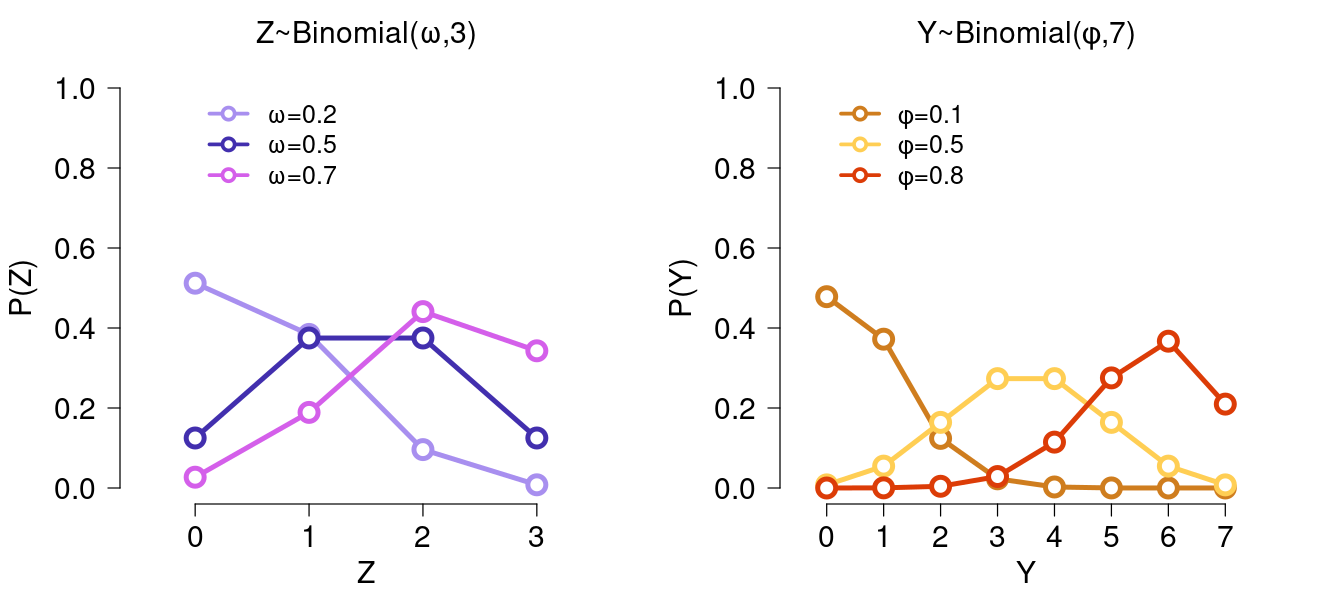

In [10]:
# Examples Binomial Distribution
# Density Definition
binom <- function(prob,n){
    x <- 0:n
    pmf <- (factorial(n)/(factorial(x)*factorial(n-x)))*(prob^x)*(1-prob)^(n-x)
    return(list(x=x,pmf=pmf))
}
# Plotting
options(repr.plot.width = 11, repr.plot.height = 5)
par(mar=c(4,5,3,2),cex.axis=1.5)
layout(matrix(1:2,ncol=2))
# 3 coin flips
n <- 3
omega <- c(0.2,0.5,0.7)
colors <- c('#a88fef','#422fae','#d45fea')
plot(NULL,xlim=c(-.5,n+.5),ylim=c(0,1),ann=F,axes=F)
axis(1,at=0:n);axis(2,las=1)
for(om in 1:length(omega)){
    distribution <- binom(omega[om],n)
    points(distribution$x,distribution$pmf,
          pch=21,bg='#ffffff',type='o',lwd=4,cex=2,col=colors[om])
}
legend(0,1,xjust=0,yjust=1,
      legend=paste('\u03c9=',omega,sep=''),
      lwd=3,col=colors,pch=21,pt.bg='#ffffff',
      seg.len=.8,pt.cex=1.35,y.intersp=1.5,x.intersp=.4,
      cex=1.25,box.lty='blank')
mtext('Z',1,line=2.5,cex=1.5)
mtext('P(Z)',2,line=3.5,cex=1.5)
mtext('Z~Binomial(\u03c9,3)',3,line=1,cex=1.5)
# 7 coin flips
m <- 7
kappa <- c(0.1,0.5,0.8)
colors <- c('#cf7d1e','#ffce54','#dc3c07')
plot(NULL,xlim=c(-.5,m+.5),ylim=c(0,1),ann=F,axes=F)
axis(1,at=0:m);axis(2,las=1)
for(kp in 1:length(kappa)){
    distribution <- binom(kappa[kp],m)
    points(distribution$x,distribution$pmf,
          pch=21,bg='#ffffff',type='o',lwd=4,cex=2,col=colors[kp])
}
legend(0,1,xjust=0,yjust=1,
      legend=paste('\u03c6=',kappa,sep=''),
      lwd=3,col=colors,pch=21,pt.bg='#ffffff',
      seg.len=.8,pt.cex=1.35,y.intersp=1.5,x.intersp=.4,
      cex=1.25,box.lty='blank')
mtext('Y',1,line=2.5,cex=1.5)
mtext('P(Y)',2,line=3.5,cex=1.5)
mtext('Y~Binomial(\u03c6,7)',3,line=1,cex=1.5)

### Ejercicio

1. Considera un aplicante que, como parte de una entrevista de trabajo, tiene que responder un examen inesperado sobre un tema del que nunca había escuchado (y en un idioma que no conoce). La prueba tiene 12 preguntas de opción múltiple, cada una con cuatro distractores y una opción correcta. ¿**Cuántos aciertos** esperas que consiga si responde todas las preguntas al azar? (Especifica la probabilidad de _cada_ posible número de aciertos.)  

2. ¿Qué tan probable es que el aplicante apruebe el examen, es decir, que tenga 7 éxitos o más?